In [1]:
# Data manipulation and numerical operations
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# # Preprocessing and scaling
# from sklearn.preprocessing import LabelEncoder, RobustScaler
# from sklearn import preprocessing  # Import preprocessing separately

# # Machine Learning - Train/test split
# from sklearn.model_selection import train_test_split

# # Pre-processing tools
# from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.impute import SimpleImputer
# from sklearn.decomposition import PCA

# # Importing linear regression models
# from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, HuberRegressor, RANSACRegressor

# # Importing non-linear regression models
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.model_selection import KFold
# from sklearn.svm import SVR, LinearSVR

# # Classification models (if needed)
# from sklearn.naive_bayes import GaussianNB
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn import tree  # For Decision Trees

# # Metrics
# from sklearn.metrics import confusion_matrix, classification_report
# from sklearn.metrics import roc_curve, roc_auc_score
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# # Suppress warnings
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
INPUT_UNENCODED_PATH = "airbnb_2022_2024_clean_unencoded.csv"
INPUT_ENCODED_PATH = "airbnb_2022_2024_clean_encoded.csv"

In [3]:
df2 = pd.read_csv(INPUT_UNENCODED_PATH, index_col="index")
print(df2.shape)
print(df2.columns)
df2.head()

(25881, 9)
Index(['host_identity_verified', 'boro', 'instant_bookable',
       'cancellation_policy', 'room_type', 'price', 'service_fee',
       'minimum_nights', 'review_rate_number'],
      dtype='object')


,host_identity_verified,boro,instant_bookable,cancellation_policy,room_type,price,service_fee,minimum_nights,review_rate_number
index,,,,,,,,,
0,True,manhattan,False,moderate,entire,142.0,28.0,30.0,4.0
5,True,brooklyn,True,strict,privater,1020.0,204.0,1.0,3.0
6,True,manhattan,False,strict,privater,646.0,129.0,30.0,1.0
8,True,manhattan,False,moderate,entire,909.0,182.0,5.0,4.0
12,True,manhattan,True,flexible,entire,523.0,105.0,7.0,5.0


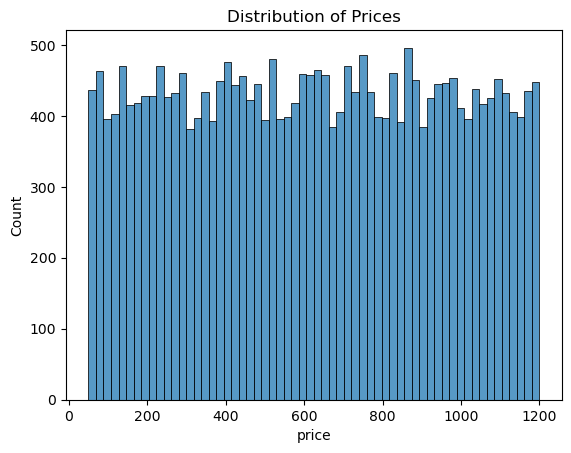

In [4]:
# Price Distribution
sns.histplot(df2['price'], bins=60)
plt.title('Distribution of Prices')
plt.show()

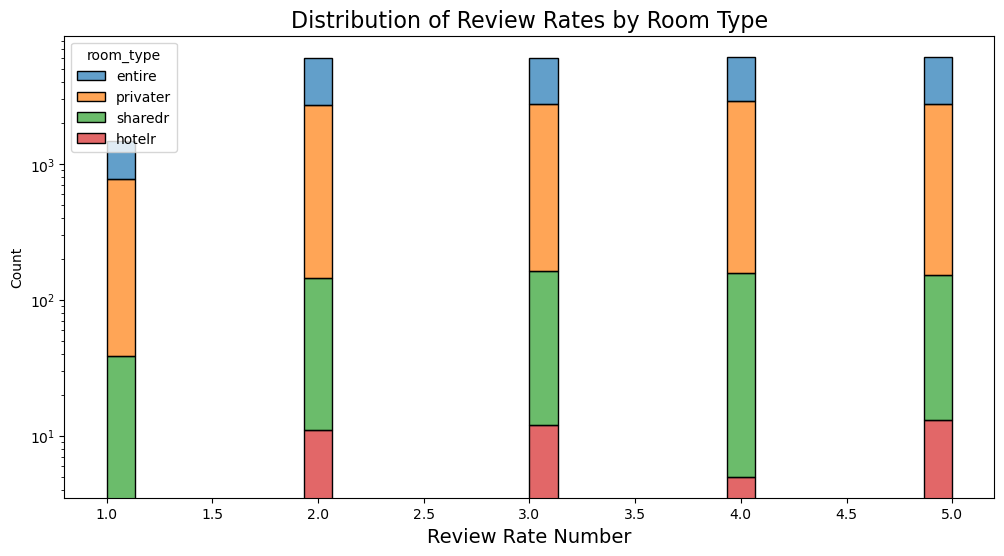

In [5]:
# Reviews
# Create a histogram with room type as hue
plt.figure(figsize=(12, 6))
sns.histplot(data=df2, x='review_rate_number', hue='room_type', multiple='stack', bins=30, alpha=0.7)
plt.title('Distribution of Review Rates by Room Type', fontsize=16)
plt.xlabel('Review Rate Number', fontsize=14)
# Set the y-axis to a logarithmic scale
plt.yscale('log')
plt.show()

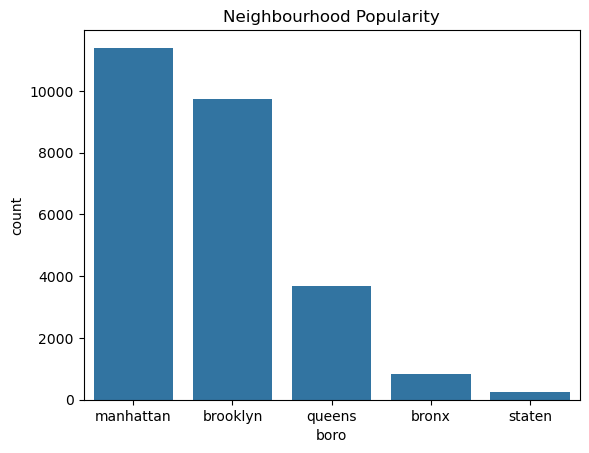

In [6]:
# Neighborhood counts
sns.countplot(data=df2, x='boro')
plt.title('Neighbourhood Popularity')
plt.show()

/var/folders/x8/57y_699j7wq0_g89kx330q480000gn/T/ipykernel_3058/3704178621.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df2, x='boro', y='price', palette='Set1')


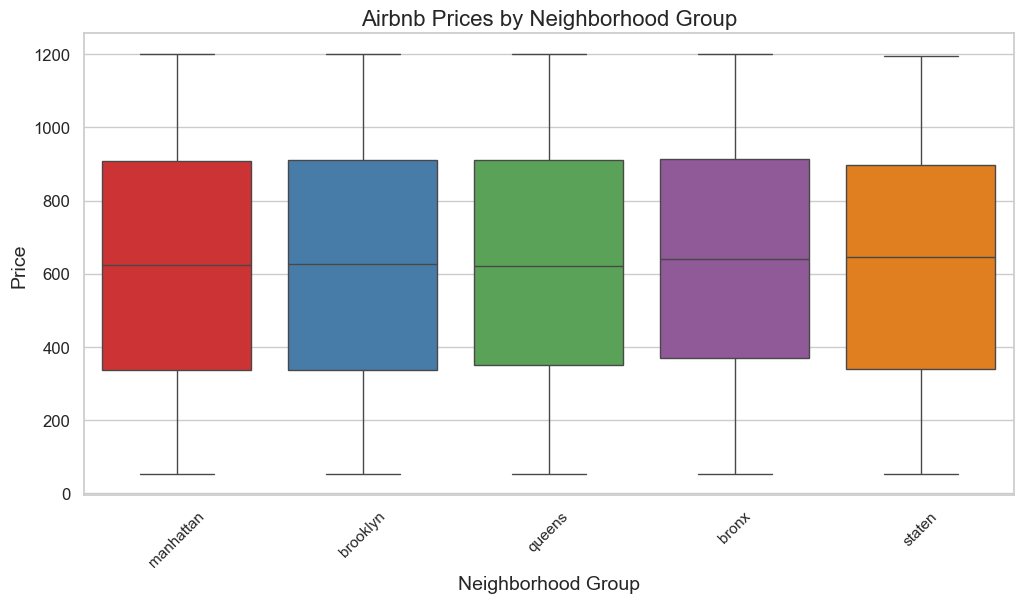

In [7]:
# Price vs Neighborhood
# Set the style of the plot
sns.set(style='whitegrid')

# Create a box plot to compare home prices with neighborhood groups
plt.figure(figsize=(12, 6))  # Set the figure size
sns.boxplot(data=df2, x='boro', y='price', palette='Set1')

# Add title and labels
plt.title('Airbnb Prices by Neighborhood Group', fontsize=16)
plt.xlabel('Neighborhood Group', fontsize=14)
plt.ylabel('Price', fontsize=14)

# Increase y-axis label font size
plt.tick_params(axis='y', labelsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

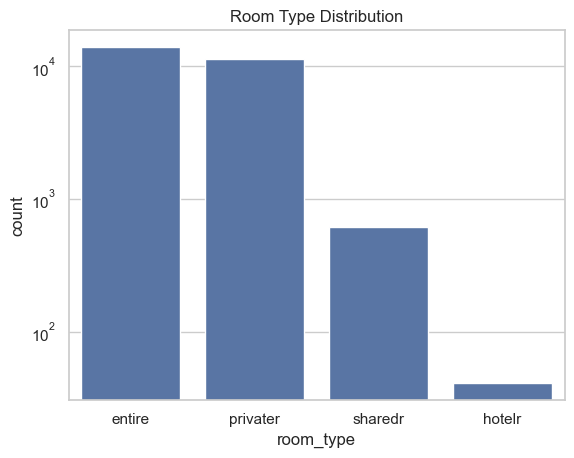

In [8]:
# Room Type Comparison
sns.countplot(data=df2, x='room_type')
plt.title('Room Type Distribution')

# Set the y-axis to a logarithmic scale
plt.yscale('log')
plt.show()

In [9]:
df_enc = pd.read_csv(INPUT_ENCODED_PATH, index_col="index")
print(df_enc.shape)
print(df_enc.columns)
df_enc.head()

(25881, 18)
Index(['host_identity_verified', 'instant_bookable', 'price', 'service_fee',
       'minimum_nights', 'review_rate_number', 'boro_bronx', 'boro_brooklyn',
       'boro_manhattan', 'boro_queens', 'boro_staten',
       'cancellation_policy_flexible', 'cancellation_policy_moderate',
       'cancellation_policy_strict', 'room_type_entire', 'room_type_hotelr',
       'room_type_privater', 'room_type_sharedr'],
      dtype='object')


,host_identity_verified,instant_bookable,price,service_fee,minimum_nights,review_rate_number,boro_bronx,boro_brooklyn,boro_manhattan,boro_queens,boro_staten,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,room_type_entire,room_type_hotelr,room_type_privater,room_type_sharedr
index,,,,,,,,,,,,,,,,,,
0,True,False,142.0,28.0,30.0,4.0,False,False,True,False,False,False,True,False,True,False,False,False
5,True,True,1020.0,204.0,1.0,3.0,False,True,False,False,False,False,False,True,False,False,True,False
6,True,False,646.0,129.0,30.0,1.0,False,False,True,False,False,False,False,True,False,False,True,False
8,True,False,909.0,182.0,5.0,4.0,False,False,True,False,False,False,True,False,True,False,False,False
12,True,True,523.0,105.0,7.0,5.0,False,False,True,False,False,True,False,False,True,False,False,False


In [10]:
# Calculate the correlation matrix
corrs = df_enc.corr()

# Display the correlation matrix
corrs

,host_identity_verified,instant_bookable,price,service_fee,minimum_nights,review_rate_number,boro_bronx,boro_brooklyn,boro_manhattan,boro_queens,boro_staten,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,room_type_entire,room_type_hotelr,room_type_privater,room_type_sharedr
host_identity_verified,1.000000,0.005996,-0.009180,-0.009150,0.004087,0.001902,-0.007358,0.010769,-0.005519,0.000118,-0.012612,0.003295,0.001821,-0.005130,0.001053,0.000853,-0.002386,0.004090
instant_bookable,0.005996,1.000000,0.008715,0.008748,-0.003326,0.009227,-0.001140,0.006975,-0.008087,0.002667,-0.000976,0.008113,-0.008920,0.000810,0.008189,-0.000884,-0.012629,0.014517
price,-0.009180,0.008715,1.000000,0.999991,0.001168,0.006280,0.004698,0.000723,-0.007308,0.007042,-0.000059,0.000408,0.006143,-0.006569,0.012274,0.003991,-0.013930,0.004131
service_fee,-0.009150,0.008748,0.999991,1.000000,0.001169,0.006335,0.004718,0.000752,-0.007360,0.007078,-0.000098,0.000394,0.006139,-0.006552,0.012331,0.004021,-0.013976,0.004085
minimum_nights,0.004087,-0.003326,0.001168,0.001169,1.000000,-0.019101,-0.025135,-0.032426,0.065593,-0.033814,-0.006542,0.004132,-0.007098,0.002974,0.071777,-0.009235,-0.070799,-0.001993
review_rate_number,0.001902,0.009227,0.006280,0.006335,-0.019101,1.000000,-0.002692,-0.011264,0.001462,0.015634,-0.002594,0.002787,-0.001452,-0.001339,0.015052,0.003858,-0.014947,-0.001599
boro_bronx,-0.007358,-0.001140,0.004698,0.004718,-0.025135,-0.002692,1.000000,-0.140957,-0.160936,-0.073807,-0.017812,0.006066,-0.001889,-0.004188,-0.036508,-0.007228,0.029163,0.026364
boro_brooklyn,0.010769,0.006975,0.000723,0.000752,-0.032426,-0.011264,-0.140957,1.000000,-0.688965,-0.315965,-0.076253,-0.012734,0.003535,0.009224,-0.098381,-0.026932,0.100665,0.001266
boro_manhattan,-0.005519,-0.008087,-0.007308,-0.007360,0.065593,0.001462,-0.160936,-0.688965,1.000000,-0.360751,-0.087061,0.017324,-0.006246,-0.011109,0.174195,0.037084,-0.173984,-0.013304
boro_queens,0.000118,0.002667,0.007042,0.007078,-0.033814,0.015634,-0.073807,-0.315965,-0.360751,1.000000,-0.039927,-0.009871,0.001560,0.008334,-0.095971,-0.010635,0.096372,0.003097


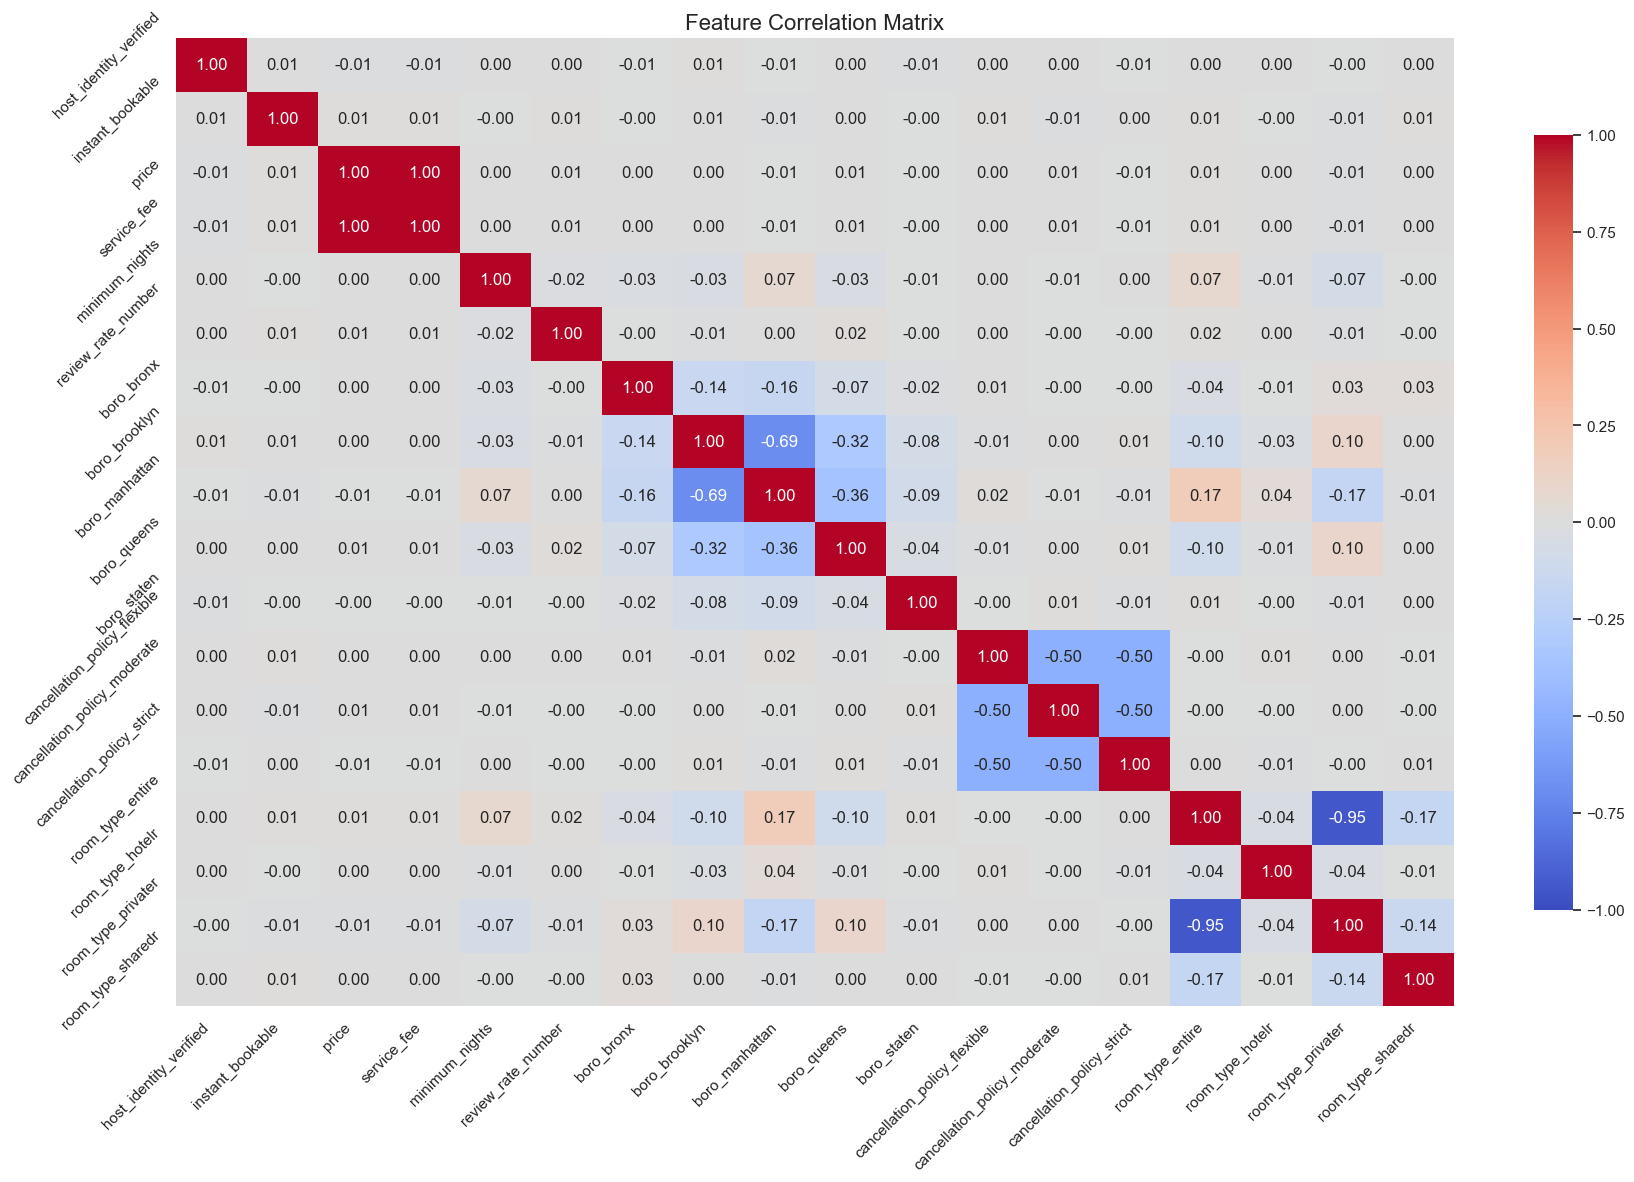

In [11]:
# Assuming 'corrs' is your correlation matrix
plt.figure(figsize=(18, 12))  # Adjust size as needed
sns.heatmap(corrs, annot=True, fmt=".2f", cmap='coolwarm',
            cbar_kws={"shrink": .8}, vmin=-1, vmax=1)

# Rotate the labels for better visibility
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)

plt.title("Feature Correlation Matrix", fontsize=16)
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

In [12]:
abs(corrs.price).sort_values(ascending=False)

price                           1.000000
service_fee                     0.999991
room_type_privater              0.013930
room_type_entire                0.012274
host_identity_verified          0.009180
instant_bookable                0.008715
boro_manhattan                  0.007308
boro_queens                     0.007042
cancellation_policy_strict      0.006569
review_rate_number              0.006280
cancellation_policy_moderate    0.006143
boro_bronx                      0.004698
room_type_sharedr               0.004131
room_type_hotelr                0.003991
minimum_nights                  0.001168
boro_brooklyn                   0.000723
cancellation_policy_flexible    0.000408
boro_staten                     0.000059
Name: price, dtype: float64